In [177]:
import numpy as np
import pandas as pd


In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [179]:
data = pd.read_csv("fire_cases_in_uk_last_3_years.csv")
data.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,000006-01012019,01 Jan 2019,2019,00:01:45,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,333.0,2.0
1,000019-01012019,01 Jan 2019,2019,00:04:33,0,Fire,Secondary Fire,NaN,Outdoor,Tree scrub,...,357.0,Edmonton,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
2,000020-01012019,01 Jan 2019,2019,00:04:39,0,False Alarm,False alarm - Good intent,NaN,Outdoor,Domestic garden (vegetation not equipment),...,318.0,Southgate,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
3,000021-01012019,01 Jan 2019,2019,00:04:44,0,False Alarm,AFA,NaN,Dwelling,Stately Home (part not open to public),...,210.0,Kensington,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
4,000024-01012019,01 Jan 2019,2019,00:05:00,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,329.0,Bethnal Green,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0


In [180]:
data.columns

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpHoursRoundUp', 'Notional Cost (£)', 'NumCalls'],
      dtype='object')

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331570 entries, 0 to 331569
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IncidentNumber                          331570 non-null  object 
 1   DateOfCall                              331570 non-null  object 
 2   CalYear                                 331570 non-null  int64  
 3   TimeOfCall                              331570 non-null  object 
 4   HourOfCall                              331570 non-null  int64  
 5   IncidentGroup                           331570 non-null  object 
 6   StopCodeDescription                     331570 non-null  object 
 7   SpecialServiceType                      112570 non-null  object 
 8   PropertyCategory                        331570 non-null  object 
 9   PropertyType                            331570 non-null  object 
 10  AddressQualifier                        3315

## Prepare data

In [182]:
data["time"] = pd.to_datetime(data["TimeOfCall"])
data["date"] = pd.to_datetime(data["DateOfCall"])
data.drop(columns = ["TimeOfCall", "DateOfCall"], inplace = True)

In [183]:
def season(month):
    if month < 3 or month == 12:
        return "winter"
    elif 3 <= month < 6:
        return "spring"
    elif 6 <= month < 9:
        return "summer"
    else:
        return "automn"
def day_time(hour):
    if hour <= 6:
        return "night"
    if hour <= 12:        
        return "morning"
    elif hour <= 18:
        return "afternoon"
    else:
        return "evening"

In [184]:
dayofweek = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
data["season"] = data["date"].apply(lambda x: season(x.month))
data["DayTime"] = data["HourOfCall"].apply(lambda x: day_time(x))
data["DayOfWeek"] = data["date"].apply(lambda x: dayofweek[x.dayofweek])

## Visualize 

<AxesSubplot:xlabel='season', ylabel='count'>

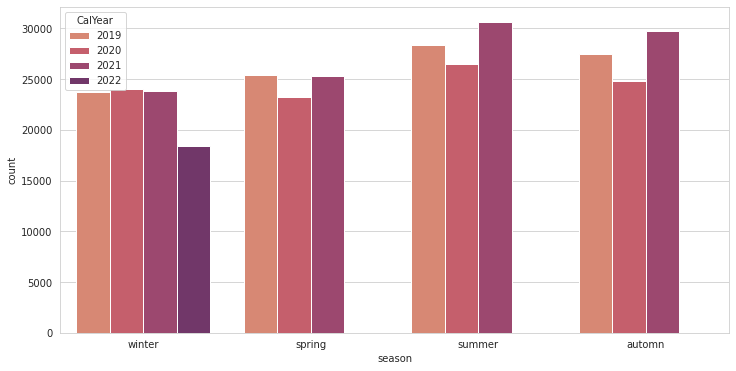

In [185]:
plt.figure(figsize = (12, 6))
sns.countplot(x = "season", data = data, hue = "CalYear",   palette= "flare")

<AxesSubplot:xlabel='NumPumpsAttending', ylabel='count'>

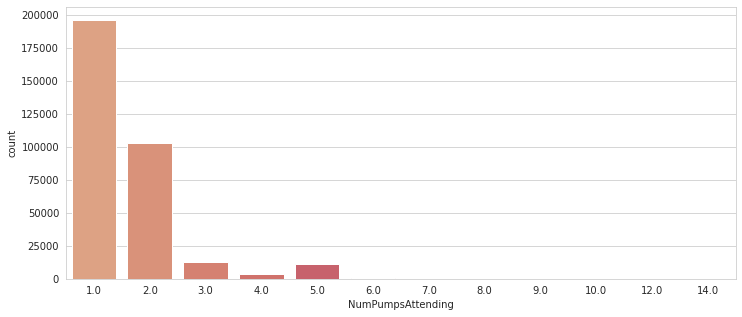

In [186]:
plt.figure(figsize = (12, 5))
sns.countplot(x = "NumPumpsAttending",hue = None ,data = data,  palette= "flare")

<AxesSubplot:xlabel='season', ylabel='count'>

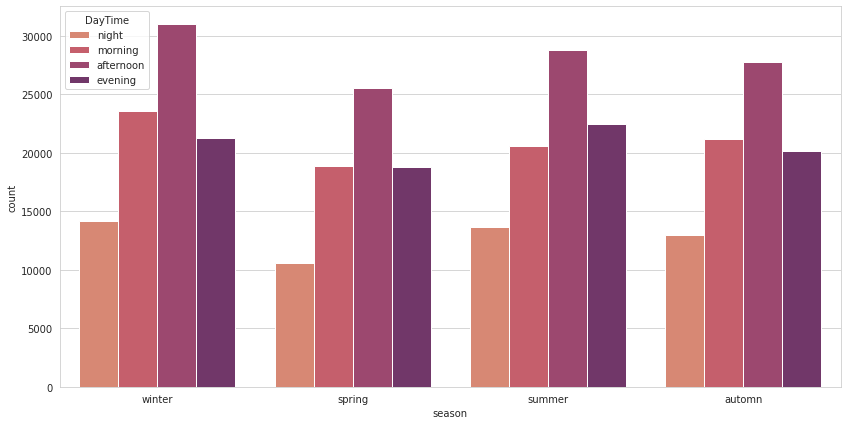

In [187]:
plt.figure(figsize = (14, 7))
sns.countplot(x = "season", data = data, hue = "DayTime", palette= "flare")

<AxesSubplot:xlabel='season', ylabel='count'>

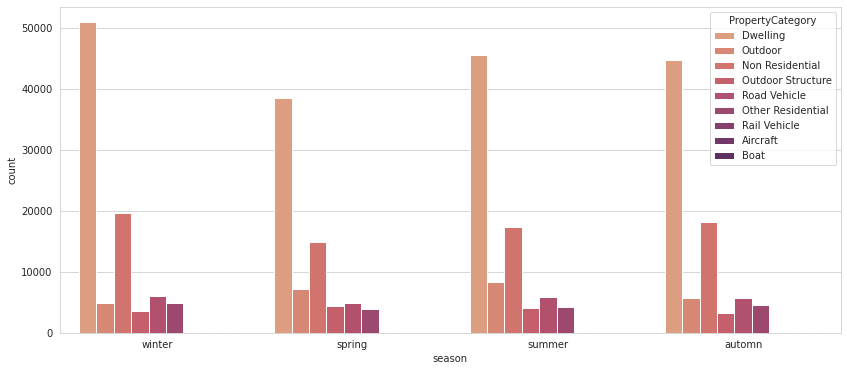

In [188]:
plt.figure(figsize = (14, 6))
sns.countplot(x = data["season"], hue = data["PropertyCategory"],  palette= "flare")

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

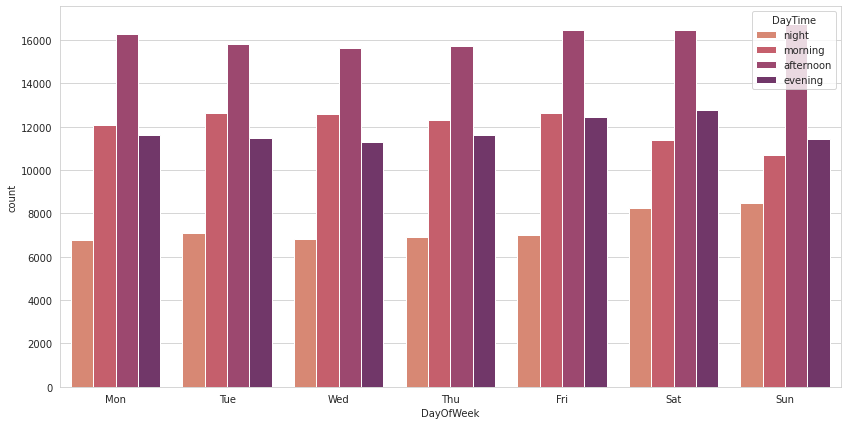

In [189]:
plt.figure(figsize = (14, 7))
sns.countplot(x = "DayOfWeek", hue = "DayTime", data = data, order = "Mon Tue Wed Thu Fri Sat Sun".split(),  palette= "flare")


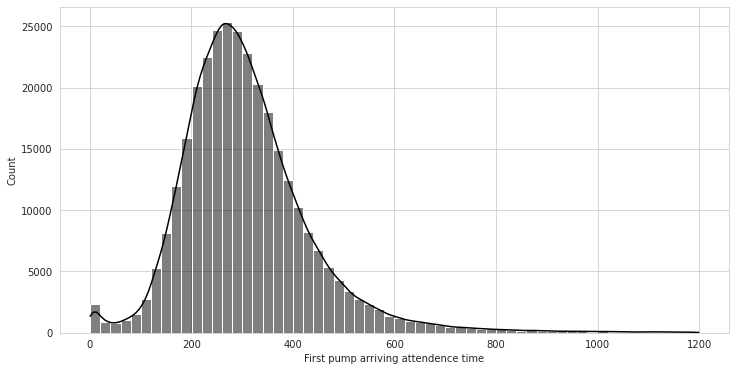

In [190]:
plt.figure(figsize = (12, 6))
plt.xlabel("First pump arriving attendence time")
s = sns.histplot(x = "FirstPumpArriving_AttendanceTime", data = data, kde = True, color = "black", bins = 60)

In [194]:
data1 = data[data["Latitude"] > 0] #data with longitude and latitude 
x = data1["Longitude"]
y = data1["Latitude"]

[ 4.63769736  2.51926884  7.20319826 ...  1.99557644  8.96463305
 34.3203302 ]


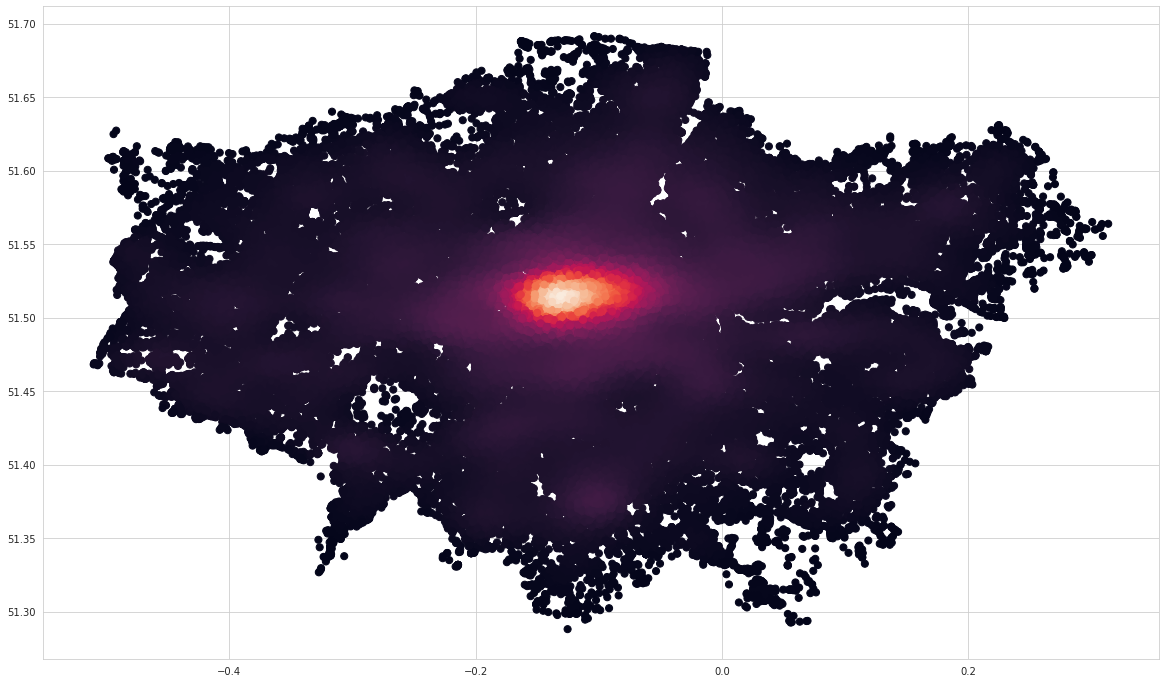

In [195]:
from scipy.stats import gaussian_kde
plt.figure(figsize = (20, 12))
xy = np.vstack([x,y])

z = gaussian_kde(xy)(xy)
print(z)

plt.scatter(x = "Longitude", y = "Latitude", data = data1, c = z, s = 50)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

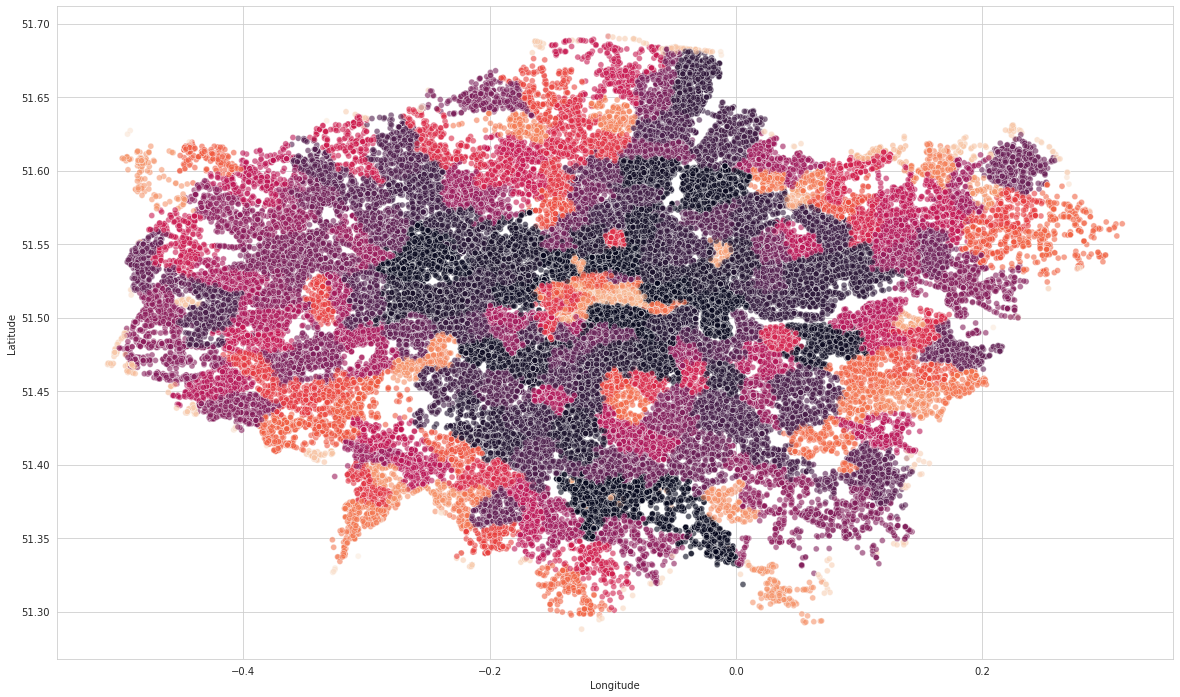

In [197]:
plt.figure(figsize = (20, 12))
sns.scatterplot(x = "Longitude", y = "Latitude", data = data1, hue = "Postcode_district", 
                alpha = 0.6 ,legend = False, palette = "rocket", 
                hue_order = data["Postcode_district"].value_counts().index)
# The darkest areas are areas with the biggest amount of fires